In [3]:
import pandas as pd
import numpy as np
import scipy as ss
import scipy.stats as ss
from scipy.stats import norm

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import math
import seaborn as sns

import scipy.stats as ss
from scipy.stats import norm
import scipy.optimize as so
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy import sparse

from scipy.sparse import diags

In [4]:
from matplotlib import pyplot
L=2*np.pi #period
nx=200 #number of space steps
x = np.linspace(0,L,nx) #define space
dx = L/(nx-1) #defining mesh grid width for space
nt =500 #number of time steps
t = np.linspace(0,0.5,nt) #define time
dt = 10e-2 #defining mesh grid width for time
u = np.cos(x) + 1/2 * np.cos(2*x) #initial condition

### parameters ###

alpha=1
beta=1

c = 1 #assumed wavespeed
sigmaa = 1
    


ufull=np.zeros([nx,nt]) #define the solution matrix


In [5]:
### coefficients ### 
c1=7/480
c2=3/20
c3=169/240
c4=61/60

b1=13/576
b2=19/72
b3=87/64
b4=13/4
b5=323/96

AA=beta*dt*b1/(dx**5)
B=-c1*alpha*dt/(dx**3) + b2*beta*dt/(dx**5) 
C=c2*alpha*dt/(dx**3) - (beta*dt*b3/(dx**5))
D=-alpha*dt*c3/(dx**3) + beta*dt*b4/(dx**5)
E=alpha*dt*c4/(dx**3) -(beta*dt*b5/(dx**5))

main_diag = -1*np.ones((1,nx)) #main diagonal consists of -BBs nx-diag+1
#print(main_diag.shape[0]) 
#print(main_diag.shape[1]) 
off_diag1 = E*np.ones((1, nx)) #lower and upper diagnonals are AAs
off_diag2 = D*np.ones((1, nx-1))
off_diag3 = C*np.ones((1, nx-2))
off_diag4 = B*np.ones((1, nx-3))
off_diag5 = -AA*np.ones((1, nx-4))
a = main_diag.shape[1] #the second index of shape, i.e. nx-2 (the bounds are not included)
diagonals = [main_diag, off_diag1, -1*off_diag1, off_diag2, -1*off_diag2,off_diag3, -1*off_diag3,off_diag4, -1*off_diag4,off_diag5, -1*off_diag5]

    #Sparse Matrix diagonals
A = sparse.diags(diagonals, [0,-1,1,-2,2,-3,3,-4,4,-5,5], shape=(a,a)).toarray()
print(A.shape)

(200, 200)


In [6]:
A[0,nx-2]=E
A[0,nx-3]=D
A[0,nx-4]=C
A[0,nx-5]=B
A[0,nx-6]=-AA

A[1,nx-2]=D
A[1,nx-3]=C
A[1,nx-4]=B
A[1,nx-5]=-AA

A[2,nx-2]=C
A[2,nx-3]=B
A[2,nx-4]=-AA

A[3,nx-2]=B
A[3,nx-3]=-AA

A[4,nx-2]=-AA
###
A[nx-1,1]=-E
A[nx-1,2]=-D
A[nx-1,3]=-C
A[nx-1,4]=-B
A[nx-1,5]=AA


A[nx-2,1]=-D
A[nx-2,2]=-C
A[nx-2,3]=-B
A[nx-2,4]=AA

A[nx-3,1]=-C
A[nx-3,2]=-B
A[nx-3,3]=AA

A[nx-4,1]=-B
A[nx-4,2]=AA

A[nx-5,1]=AA

print(A.shape)

(200, 200)


In [7]:
un = u.copy() #copy all the us into un one time before running the loop
import sys

In [8]:
for n in range(nt):
    
    
    k=np.zeros(nx) #A*U=K
    for i in range (5,nx-5): #one less and one more from what you know
        k[i]=AA*un[i-5]-B*un[i-4]-C*un[i-3]-D*un[i-2]-E*un[i-1]-un[i]+E*un[i+1]+D*un[i+2]+C*un[i+3]+B*un[i+4]-AA*un[i+5]
    k[0]=AA*un[nx-6]-B*un[nx-5]-C*un[nx-4]-D*un[nx-3]-E*un[nx-2]-un[0]+E*un[1]+D*un[2]+C*un[3]+B*un[4]-AA*un[5]
    k[1]=AA*un[nx-5]-B*un[nx-4]-C*un[nx-3]-D*un[nx-2]-E*un[nx-1]-un[1]+E*un[2]+D*un[3]+C*un[4]+B*un[5]-AA*un[6]
    k[2]=AA*un[nx-4]-B*un[nx-3]-C*un[nx-2]-D*un[nx-1]-E*un[1]-un[2]+E*un[3]+D*un[4]+C*un[5]+B*un[6]-AA*un[7]
    k[3]=AA*un[nx-3]-B*un[nx-2]-C*un[nx-1]-D*un[1]-E*un[2]-un[3]+E*un[4]+D*un[5]+C*un[6]+B*un[7]-AA*un[8]
    k[4]=AA*un[nx-2]-B*un[nx-1]-C*un[1]-D*un[2]-E*un[3]-un[4]+E*un[5]+D*un[6]+C*un[7]+B*un[8]-AA*un[9]
    
    k[nx-1]=AA*un[nx-6]-B*un[nx-5]-C*un[nx-4]-D*un[nx-3]-E*un[nx-2]-un[nx-1]+E*un[1]+D*un[2]+C*un[3]+B*un[4]-AA*un[5]
    k[nx-2]=AA*un[nx-7]-B*un[nx-6]-C*un[nx-5]-D*un[nx-4]-E*un[nx-3]-un[nx-2]+E*un[0]+D*un[1]+C*un[2]+B*un[3]-AA*un[4]
    k[nx-3]=AA*un[nx-8]-B*un[nx-7]-C*un[nx-6]-D*un[nx-5]-E*un[nx-4]-un[nx-3]+E*un[nx-2]+D*un[0]+C*un[1]+B*un[2]-AA*un[3]
    k[nx-4]=AA*un[nx-9]-B*un[nx-8]-C*un[nx-7]-D*un[nx-6]-E*un[nx-5]-un[nx-4]+E*un[nx-3]+D*un[nx-2]+C*un[0]+B*un[1]-AA*un[2]
    k[nx-5]=AA*un[nx-10]-B*un[nx-9]-C*un[nx-8]-D*un[nx-7]-E*un[nx-6]-un[nx-5]+E*un[nx-4]+D*un[nx-3]+C*un[nx-2]+B*un[0]-AA*un[1]
    #print(k)
    u=np.dot(np.linalg.inv(A),k.T) #U= inverse of A * transpose of K
    
    #shifted if 1-nx-1
    un = u.copy()
 
    
    #u=np.nan_to_num(u) 
   
    #print(u)
    ufull[:,n]=u
    
     #all rows, nth timestep or all columns, ith space step
# plt.plot(x, np.cos(x-(tFinal)*dt),'r')
# plt.plot(x, ufull[:,nt-1]) #plot when t=3
#print(ufull)
#print(ufull[:,3])

Text(0, 0.5, 'u(x,t)')

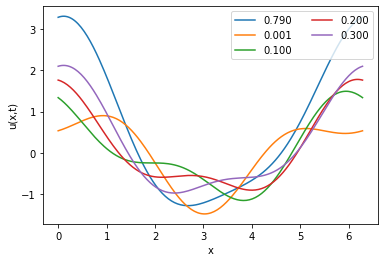

In [9]:
tFinal = 490
# plt.plot(x, np.cos(x-alpha*(tFinal)*dt),'r')

plt.plot(x, ufull[:,tFinal])
plt.plot(x, ufull[:,1])
plt.plot(x, ufull[:,100])
plt.plot(x, ufull[:,200])
plt.plot(x, ufull[:,300])
plt.legend(['0.790','0.001','0.100','0.200','0.300'], ncol=2, loc='upper right')
plt.xlabel('x')
plt.ylabel('u(x,t)')

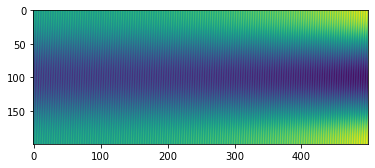

In [10]:
image = matplotlib.pyplot.imshow(ufull)
matplotlib.pyplot.show()

In [11]:
#     k[0]=AA*un[0]-B*un[1]-C*un[2]-D*un[3]-E*un[4]-un[5]+E*un[6]+D*un[7]+C*un[8]+B*un[9]-AA*un[10]-E*un[4]-D*un[3]-C*un[2]-B*un[1]+AA*un[0] #5
#     k[1]=AA*un[1]-B*un[2]-C*un[3]-D*un[4]-E*un[5]-un[6]+E*un[7]+D*un[8]+C*un[9]+B*un[10]-AA*un[11]-D*un[4]-C*un[3]-B*un[2]+AA*un[1] #6
#     k[2]=AA*un[2]-B*un[3]-C*un[4]-D*un[5]-E*un[6]-un[7]+E*un[8]+D*un[9]+C*un[10]+B*un[11]-AA*un[12]-C*un[4]-B*un[3]+AA*un[2] #7
#     k[3]=AA*un[3]-B*un[4]-C*un[5]-D*un[6]-E*un[7]-un[8]+E*un[9]+D*un[10]+C*un[11]+B*un[12]-AA*un[13]-B*un[4]+AA*un[3] #8
#     k[4]=AA*un[4]-B*un[5]-C*un[6]-D*un[7]-E*un[8]-un[9]+E*un[10]+D*un[11]+C*un[12]+B*un[13]-AA*un[14]+AA*un[4] #9
    
#     k[nx-11]=AA*un[nx-11]-B*un[nx-10]-C*un[nx-9]-D*un[nx-8]-E*un[nx-7]-un[nx-6]+E*un[nx-5]+D*un[nx-4]+C*un[nx-3]+B*un[nx-2]-AA*un[nx-1]+E*un[nx-5]+D*un[nx-4]+C*un[nx-3]+B*un[nx-2]-AA*un[nx-1] #nx-6
#     k[nx-12]=AA*un[nx-12]-B*un[nx-11]-C*un[nx-10]-D*un[nx-9]-E*un[nx-8]-un[nx-7]+E*un[nx-6]+D*un[nx-5]+C*un[nx-4]+B*un[nx-3]-AA*un[nx-2]+D*un[nx-5]+C*un[nx-4]+B*un[nx-3]-AA*un[nx-2] #nx-7
#     k[nx-13]=AA*un[nx-13]-B*un[nx-12]-C*un[nx-11]-D*un[nx-10]-E*un[nx-9]-un[nx-8]+E*un[nx-7]+D*un[nx-6]+C*un[nx-5]+B*un[nx-4]-AA*un[nx-3]+C*un[nx-5]+B*un[nx-4]-AA*un[nx-3] #nx-8
#     k[nx-14]=AA*un[nx-14]-B*un[nx-13]-C*un[nx-12]-D*un[nx-11]-E*un[nx-10]-un[nx-9]+E*un[nx-8]+D*un[nx-7]+C*un[nx-6]+B*un[nx-5]-AA*un[nx-4]+B*un[nx-5]-AA*un[nx-4] #nx-9
#     k[nx-15]=AA*un[nx-15]-B*un[nx-14]-C*un[nx-13]-D*un[nx-12]-E*un[nx-11]-un[nx-10]+E*un[nx-9]+D*un[nx-8]+C*un[nx-7]+B*un[nx-6]-AA*un[nx-5]-AA*un[nx-5] #nx-10


In [12]:
np.linalg.cond(A)

35102660599014.113

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

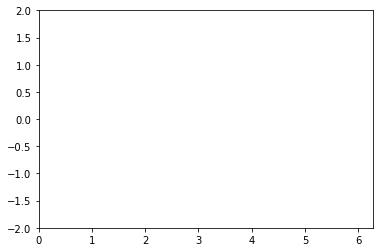

In [14]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
#line2, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #line2.set_data([], [])
    return (line,)

In [15]:
def animate(i):
    y=ufull[:,i]
    #y2=np.cos(x-alpha*(i+1)*dt)
    line.set_data(x,y)
    #line2.set_data(x,y2)
    return(line,)


In [16]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nt-1, interval=nx) #frames is nt

In [17]:
HTML(anim.to_jshtml())


In [128]:
t=np.linspace(0,L,100)
y=np.cos(t) + 1/2*np.cos(2*t) + 1/3*np.cos(3*t) + + 1/4*np.cos(4*t) +1/5*np.cos(5*t) +1/6*np.cos(6*t)

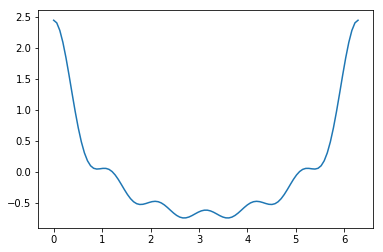

In [129]:
plt.plot(t,y)

In [19]:
np.savetxt("ufull.csv", ufull, delimiter=",")

In [20]:
np.savetxt("time.csv", t, delimiter=",")
np.savetxt("x.csv", x, delimiter=",")